Q1.(Gaussian Naïve Bayes Classifier) Implement Gaussian Naïve Bayes
Classifier on the Iris dataset from sklearn.datasets using
(i) Step-by-step implementation
(ii) In-built function

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
priors = {}
class_means = {}
class_vars = {}

classes = np.unique(y_train)
n_features = X_train.shape[1]

for c in classes:
    X_train_c = X_train[y_train == c]
    priors[c] = len(X_train_c) / len(X_train)

    class_means[c] = np.mean(X_train_c, axis=0)
    class_vars[c] = np.var(X_train_c, axis=0)

print(f"Classes: {classes}")
print(f"Priors (P(c)): {priors}")
print(f"Class 0 Means: {class_means[0]}")
print(f"Class 0 Variances: {class_vars[0]}")

Training data shape: (120, 4)
Testing data shape: (30, 4)
Classes: [0 1 2]
Priors (P(c)): {np.int64(0): 0.3333333333333333, np.int64(1): 0.3416666666666667, np.int64(2): 0.325}
Class 0 Means: [4.99   3.4525 1.45   0.245 ]
Class 0 Variances: [0.1239     0.15249375 0.033      0.010975  ]


The step by step model evaluation
Overall Accuracy: 0.9667

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



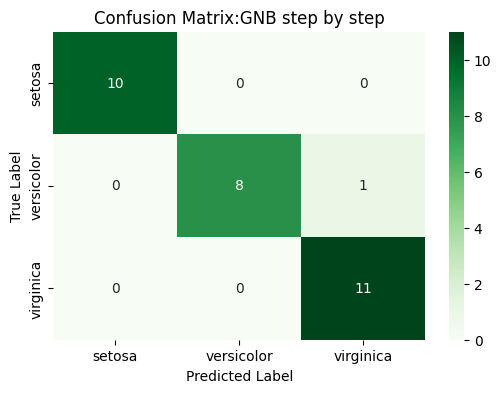

In [2]:
def gaussian_pdf(x, mean, var):
    epsilon = 1e-9
    numerator = np.exp(-((x - mean) ** 2) / (2 * (var + epsilon)))
    denominator = np.sqrt(2 * np.pi * (var + epsilon))
    return numerator

y_pred_scratch = []

for x_sample in X_test:
    posteriors = []

    for c in classes:
        prior_log = np.log(priors[c])

        likelihood_log = np.sum(np.log(gaussian_pdf(x_sample, class_means[c], class_vars[c])))

        posterior_log = prior_log + likelihood_log
        posteriors.append(posterior_log)

    y_pred_scratch.append(classes[np.argmax(posteriors)])

print("The step by step model evaluation")
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
print(f"Overall Accuracy: {accuracy_scratch:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_scratch, target_names=iris.target_names))

cm_scratch = confusion_matrix(y_test, y_pred_scratch)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_scratch, annot=True, fmt='d', cmap='Greens',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix:GNB step by step')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Overall Accuracy: 1.0000

sklearn Priors: [0.33333333 0.34166667 0.325     ]
sklearn Class 0 Means: [4.99   3.4525 1.45   0.245 ]
sklearn Class 0 Variances: [0.1239     0.15249375 0.033      0.010975  ]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



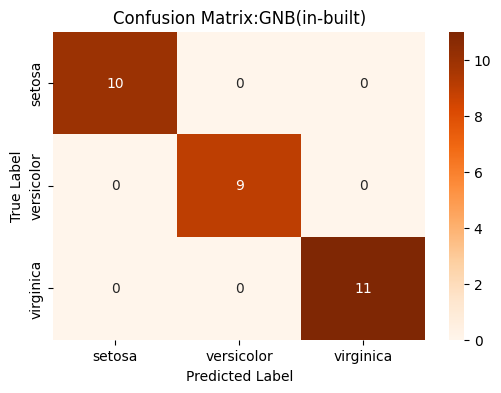

In [4]:
model_builtin = GaussianNB()

model_builtin.fit(X_train, y_train)

y_pred_builtin = model_builtin.predict(X_test)

accuracy_builtin = accuracy_score(y_test, y_pred_builtin)
print(f"Overall Accuracy: {accuracy_builtin:.4f}\n")

print(f"sklearn Priors: {model_builtin.class_prior_}")
print(f"sklearn Class 0 Means: {model_builtin.theta_[0]}")
print(f"sklearn Class 0 Variances: {model_builtin.var_[0]}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred_builtin, target_names=iris.target_names))

cm_builtin = confusion_matrix(y_test, y_pred_builtin)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_builtin, annot=True, fmt='d', cmap='Oranges',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix:GNB(in-built)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Q2.Explore about GridSearchCV toot in scikit-learn. This is a tool that is
often used for tuning hyperparameters of machine learning models. Use
this tool to find the best value of K for K-NN Classifier using any dataset.

Best K (n_neighbors) found: {'n_neighbors': 3}
Best Cross-Validation Accuracy: 0.9583
Test Set Accuracy: 1.0000

Classification Report(best knn):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



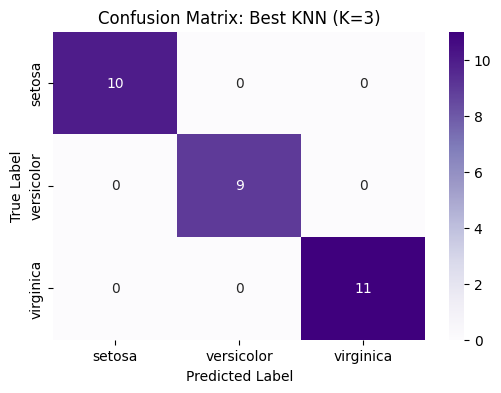

In [6]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': list(range(1, 21))
}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1)

grid_search.fit(X_train, y_train)
print(f"Best K (n_neighbors) found: {grid_search.best_params_}")

print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")
best_knn_model = grid_search.best_estimator_

y_pred_best_knn = best_knn_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_best_knn)

print(f"Test Set Accuracy: {test_accuracy:.4f}")

print("\nClassification Report(best knn):")
print(classification_report(y_test, y_pred_best_knn, target_names=iris.target_names))

cm_knn = confusion_matrix(y_test, y_pred_best_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Purples', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title(f'Confusion Matrix: Best KNN (K={grid_search.best_params_["n_neighbors"]})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()